# Fair Price - Predicting Car Prices Using kNN

![Car_Image](https://miro.medium.com/max/648/1*kQBj7l-Y1WPZfX9nKIYL1Q.jpeg)

In this project, we analyze a dataset involving cars and predict car prices. The dataset contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

**Goal**: To predict car prices using the K-Nearest Neighbors (kNN) algorithm.

## Summary of Results

We concluded that...

For more details, please refer to the the full analysis below.

## Concepts Used

* The basics of programming in Python (arithmetical operations, variables, common data types, etc.)
* Jupyter Notebook
* Working with Strings
* List and for loops
* Conditional statements
* Dictionaries
* Functions
* Data Aggregation
* Visualization libraries: matplotlib, seaborn etc
* Pattern Extraction
* Regular Expressions (Regex)
* Combining Dataframes

## Data Overview

This dataset can be downloaded from the UCI Machine Learning Repository website [here](https://archive.ics.uci.edu/ml/datasets/automobile).

This dataset consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

## Data Exploration

Let's import libraries, load the dataset and look at the first couple of rows. We will also provide column definitions and identify features and the target column.

In [1]:
# Importing libraries
import pandas as pd

# Settings for displaying all columns
pd.set_option('display.max_columns', None)

# cars dataset
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It seems that the column names don't match the ones in the [dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile). Lets update the column names and reload the dataset.

In [2]:
# Column names
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
# cars dataset
cars = pd.read_csv('imports-85.data',names=cols)
cars.head() # displaying first few rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Information about the cars dataset
print(cars.info())

for col in cars: # unique values for each column
    print(col,'unique values:',cars[col].unique())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

For the cars dataset, we have data describing 205 cars with 26 columns. 16 columns have an object datatype, 5 columns have an integer datatype and 5 columns have a float datatype. Many columns have missing values marked by **?**. Here's a description for each column :

* **`symboling`**: Insurance risk rating (-3, -2, -1, 0, 1, 2, 3)
* **`normalized-losses`**: The relative average loss payment per insured vehicle year (continuous from 65 to 256)
* **`make`**: The brand of car (bmw, chevrolet, dodge, etc.)
* **`fuel-type`**: The type of fuel (diesel, gas)
* **`aspiration`**: The exhaust of the car (standard or turbo)
* **`num-of-doors`**: The number of doors in the car (four or two)
* **`body-style`**: The type of the vehicle (hardtop, wagon, sedan, hatchback or convertible
* **`drive-wheels`**: Wheel system used by car (4 wheel-drive, front wheel-drive, rear wheel-drive)
* **`engine-location`**: (front or rear)
* **`wheel-base`**: (continuous from 86.6 120.9)
* **`length`**: (continuous from 141.1 to 208.1)
* **`width`**: (continuous from 60.3 to 72.3)
* **`height`**: (continuous from 47.8 to 59.8)
* **`curb-weight`**: (continuous from 1488 to 4066)
* **`engine-type`**: The type of engine (dohc, dohcv, l, ohc, ohcf, ohcv or rotor)
* **`num-of-cylinders`**: (eight, five, four, six, three, twelve, or two)
* **`engine-size`**: (continuous from 61 to 326)
* **`fuel-system`**: (1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi or spfi)
* **`bore`**: (continuous from 2.54 to 3.94)
* **`stroke`**: (continuous from 2.07 to 4.17)
* **`compression-ratio`**: (continuous from 7 to 23)
* **`horsepower`**: (continuous from 48 to 288)
* **`peak-rpm`**: Revolutions per minute - used as a measure of how fast any machine is operating at a given time (continuous from 4150 to 6600)
* **`city-mpg`**: Miles per gallon while driving within city (continuous from 13 to 49)
* **`highway-mpg`**: Miles per gallon while driving on highway (continuous from 16 to 54)
* **`price`**: (continuous from 5118 to 45400)

The **target** column is `price` and possible **features** are numerical columns (`normalized-losses`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `bore`, `stroke`, `compression-ratio`, `horsepower`, `peak-rpm`, `city-mpg` and `highway-mpg`). 

Let's update our dataframe with only **target** and **feature** columns.

In [4]:
# Numeric columns only dataframe
numeric_cars = cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

# Verifying our results
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleanup: Dealing with Missing & Duplicate Values

* We will replace all the missing values currently marked with **?** to Nan.

* Next, we will make sure all columns have a numeric datatype.

* Then, we will visualize columns with missing values and decide what statistical measures (Mean, Median or Mode) to impute with.

* Lastly, we will check for duplicate values.

In [5]:
# Importing NumPy
import numpy as np

# Updating missing values
numeric_cars = numeric_cars.replace('?',np.nan)

# Verifying our results
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Checking type for our dataframe
print(numeric_cars.dtypes)

# Cnverting all columns to numeric datatype
numeric_cars = numeric_cars.astype(float)

# Verifying updates
print(numeric_cars.dtypes)

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object


wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
compression-rate      0
city-mpg              0
highway-mpg           0
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64


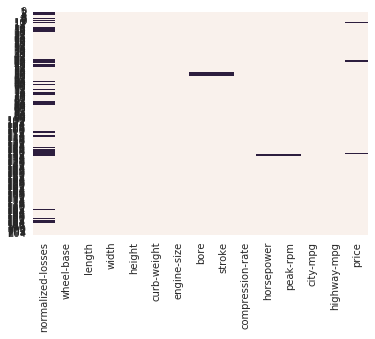

In [7]:
# Checking missing values for each column
print(numeric_cars.isnull().sum().sort_values())

# Visualizing missing values
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.heatmap(numeric_cars.isnull(), cbar=False)

We will drop the missing rows from the `price` column as it is the **target** column. Then, we'll visualize the `normalized-losses`, `horsepower`, `peak-rpm`, `bore` and `stroke` columns.       

In [8]:
# Dropping missing rows from the price column
numeric_cars = numeric_cars.dropna(subset=['price'])

# Verifying missing values in price column
print(numeric_cars['price'].isnull().sum())

0


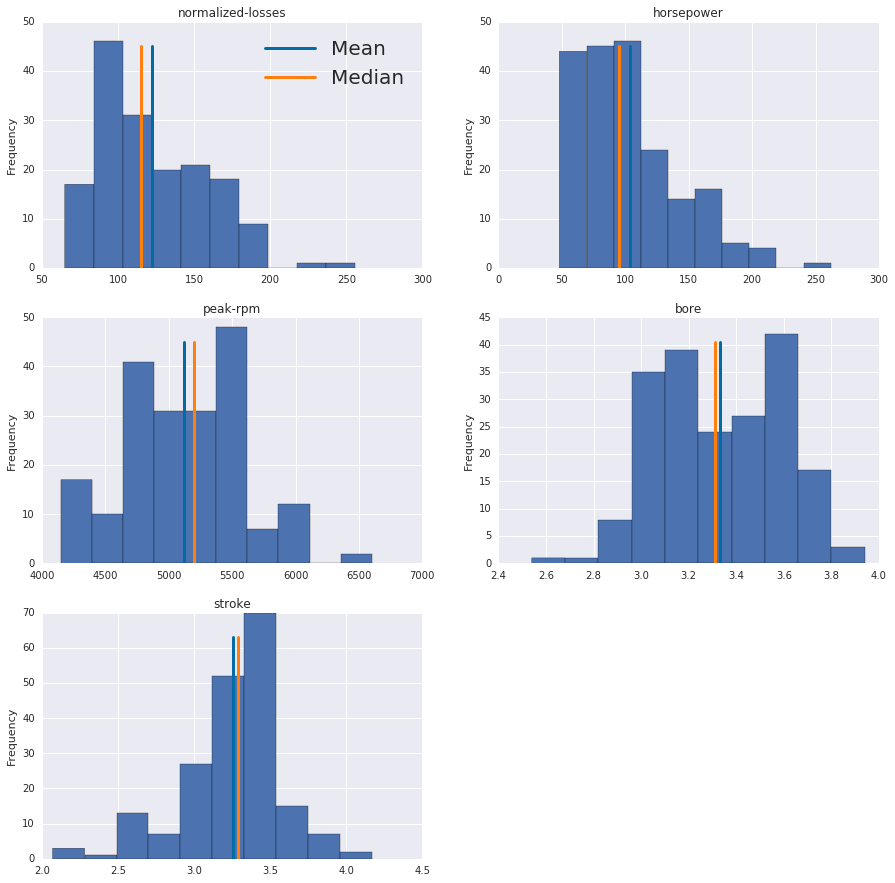

In [9]:
# Plotting histogram for columns
missing_cols = ['normalized-losses','horsepower','peak-rpm','bore','stroke']

# Colors for plots
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_red = (200/255,82/255.0/255)

fig = plt.figure(figsize=(15,15))

for sp in range(0,5):
    
    ax = fig.add_subplot(3,2,sp+1)
    mean = numeric_cars[missing_cols[sp]].mean() 
    median = numeric_cars[missing_cols[sp]].median()
    mode = numeric_cars[missing_cols[sp]].mode()
    ax = numeric_cars[missing_cols[sp]].plot.hist()
    ax.axvline(x = mean, c= cb_dark_blue, linewidth=3, ymax= .9, label = "Mean")
    ax.axvline(x = median, c= cb_orange, linewidth=3, ymax = .9, label = "Median")
    ax.set_title(missing_cols[sp])
    
    if sp == 0:
        plt.legend(['Mean', 'Median'], loc='upper right',handlelength=2.5, fontsize=20)

* `normalized-losses` and `horsepower` seem right-skewed
* `peak-rpm` and `bore` have a somewhat of a bi-modal shape
* `stroke` looks approximately normal

Let's take a look at the standardized boxplots to understand outliers and the shape of our columns better.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning:

The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



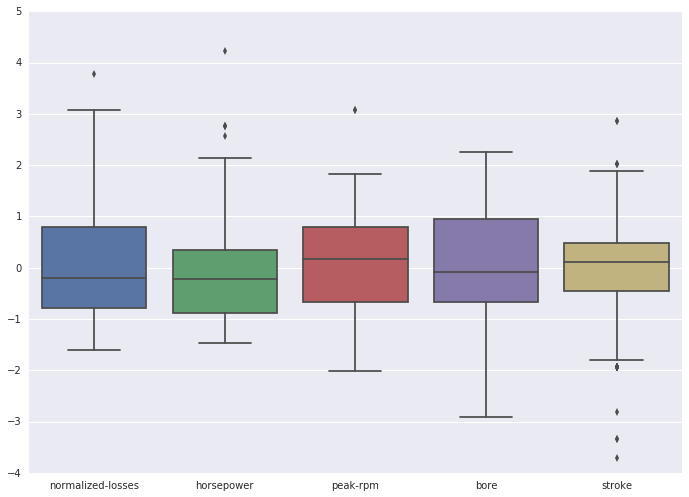

In [10]:
# Normalizing columns
missing_normalized = (numeric_cars[missing_cols] - numeric_cars[missing_cols].mean())/(numeric_cars[missing_cols].std())

# Adjusting figure size
sns.set(rc={'figure.figsize':(11.7,8.27)}) 

# Plotting boxplots
sns.boxplot(missing_normalized)

Each of the 5 columns have outliers, and since the mean is very sensitive to outliers, it would be better to impute with the median. The median is a robust statistic and isn't effected by outliers as much.

In [11]:
# Imputation using median
numeric_cars = numeric_cars.fillna(numeric_cars.median())

# Verifying our results
numeric_cars.isnull().sum().sort_values()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Let's check for duplicate values now.

In [12]:
# Duplicate values
numeric_cars[numeric_cars.duplicated()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price


There are no duplicate values in our dataframe.

# Data Cleanup: Normalizing Features

We will normalize features so that all values range from 0 to 1. This helps prevent any single value having too much impact on the similarity metric used in the kNN algorithm, Euclidean distance. We will not normalize the target column.

In [13]:
# Normalizing features
target = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = target

# Verifying Updates
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.261780,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.261780,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.261780,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Prediction: Univariate Case

We will start by implementing univariate K-Nearest Neighbors models. We will create a function called **knn_train_test()** that encapsulates the simple train/test validation process. Specifically, the function will:

* Take in 3 parameters: training column, target column, dataframe
* Randomize the order of the dataframe and split the dataset into test (20%) and training (80%)
* Fit the model on the training set, and make predictions on the test set
* Return the RMSE as the value

For reproducibility, we will set seed = 1.

In [14]:
# Univariate function
def knn_train_test(training_column,target_column,df):
    # Setting seed
    np.random.seed(1)
    
    # Randomizing order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    random_df = df.loc[shuffled_index]
                                    
    # Splitting the dataframe into test and train
    last_row = int(len(random_df)*0.8)                                       
    train_df = random_df.iloc[0:last_row]
    test_df = random_df.iloc[last_row:]
                                           
    # Fitting a kNN model
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_column]],train_df[target_column])
    
    # Making predictions using model
    predictions = knn.predict(test_df[[training_column]])
                                           
    # Calculate and return RMSE
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(test_df[target_column],predictions)
    rmse = np.sqrt(mse)
    return rmse

We will use the function to train and test univariate models using different features in the dataset. Let's see which feature performs the best using the defualt **k** value.

In [15]:
# Training columns
training_cols = numeric_cars.columns.drop('price')

# Dictionary to store rmse results
univariate_rmse = {}

# Training a model for each column and returning RMSE value
for col in training_cols:
    rmse_value = knn_train_test(col,'price', numeric_cars)
    univariate_rmse[col] = rmse_value

# Displaying RMSE results in ascending order
rmse_series = pd.Series(univariate_rmse)
rmse_series.sort_values()

engine-size          3165.411107
curb-weight          3542.232504
city-mpg             4004.261065
width                4289.527858
highway-mpg          4425.000532
wheel-base           4692.348776
horsepower           4991.745447
length               5776.389428
compression-rate     5823.942730
normalized-losses    6863.528521
peak-rpm             7028.689708
height               7114.466472
stroke               8521.420863
bore                 8554.125308
dtype: float64

Seems that the feature `engine-size` performs the best with the lowest RMSE of 3165.41

# Prediction: Univariate Case with Hyperparameter Optimization

Now, let's update the function with a range of **k** values (1,3,5,7,9) and rerun the predictions.

In [27]:
# Updating function
def knn_train_test_k(training_column,target_column,df):
    # Setting seed
    np.random.seed(1)
    
    # Randomizing order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    random_df = df.loc[shuffled_index]
                                    
    # Splitting the dataframe into test and train
    last_row = int(len(random_df)*0.8)                                       
    train_df = random_df.iloc[0:last_row]
    test_df = random_df.iloc[last_row:]
    
    # K values
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
                                           
        # Fitting a kNN model
        from sklearn.neighbors import KNeighborsRegressor
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[training_column]],train_df[target_column])

        # Making predictions using model
        predictions = knn.predict(test_df[[training_column]])

        # Calculate and store RMSES
        from sklearn.metrics import mean_squared_error
        mse = mean_squared_error(test_df[target_column],predictions)
        k_rmses[k] = np.sqrt(mse)
        
    # Return dictionary of RMSES
    return k_rmses

# Dictionary to store rmse results
univariate_rmse_k = {}

# Training a model for each column and returning RMSE values
for col in training_cols:
    rmse_values = knn_train_test_k(col,'price', numeric_cars)
    univariate_rmse_k[col] = rmse_values

# Displaying the rmses dictionary
univariate_rmse_k

{'bore': {1: 11325.623045371662,
  3: 11014.51352315487,
  5: 8554.125307510136,
  7: 8359.399569155337,
  9: 8769.63925317536},
 'city-mpg': {1: 4974.416639409995,
  3: 3928.700182242369,
  5: 4004.261065171548,
  7: 4081.310648036243,
  9: 4339.190601157172},
 'compression-rate': {1: 7799.828345515829,
  3: 6163.730431482084,
  5: 5823.942730470903,
  7: 6157.7248722066115,
  9: 6407.497099828602},
 'curb-weight': {1: 4185.38209637817,
  3: 3865.4854755980678,
  5: 3542.232503971912,
  7: 3648.8946863476,
  9: 3902.9189076894745},
 'engine-size': {1: 3408.2198056907127,
  3: 2922.210479074161,
  5: 3165.4111068109232,
  7: 3075.289045001077,
  9: 3146.558145913208},
 'height': {1: 6148.6606790699925,
  3: 7574.277044037761,
  5: 7114.46647188053,
  7: 7059.4162099980385,
  9: 7112.208123377993},
 'highway-mpg': {1: 6099.731359538433,
  3: 4905.003872215584,
  5: 4425.000531789963,
  7: 4250.7808647564025,
  9: 4668.313503523361},
 'horsepower': {1: 4177.142677862406,
  3: 4468.759179

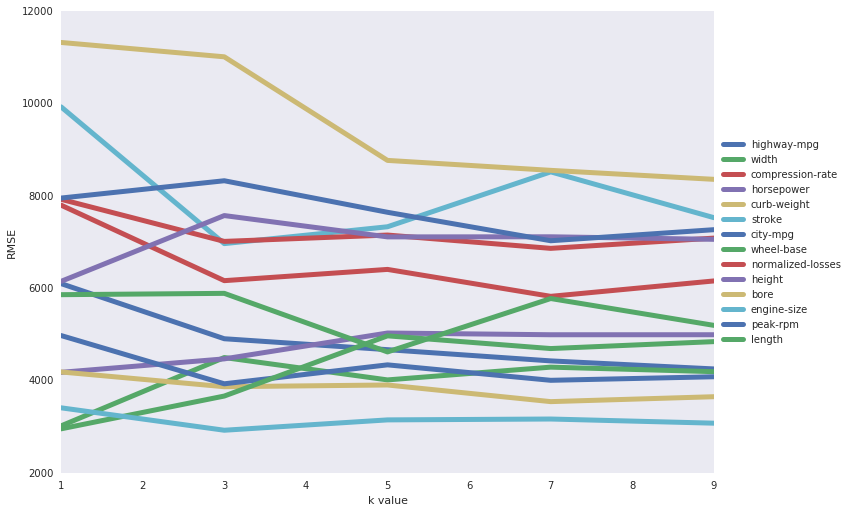

In [31]:
# Visualizing our results
colors_lst = ['black','red','sandybrown','darkorange','gold','yellow','greenyellow','turquoise','dodgerblue','teal','crimson','fuschia','deeppink','slategrey']

for key in univariate_rmse_k:
    y = list(univariate_rmse_k[key].values())
    x = [1,3,5,7,9] 
    
    plt.plot(x,y, label=key, linewidth=5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.grid('off')

It seems that increaseing the **k** value doesn't always decrease the RMSE. The RMSE for features is minimized when the **k** value is in between, neither too low (1) or too high (9). The lowest RMSE of 2922.21 was achieved for the `engine-size` feature with a **k** value of 3.

It is worth mentioning that working under the impression that a lower RMSE always means that a model is more accurate isn't always true. A model has two sources of error, **Bias** and **Variance**.

**Bias** descirbes error that results in bad assumptions about learning algorithm. For example, assuming that only one feature like the car's engine-size, relates to a car price will lead one to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's price is affected by many other factors besides just its engine-size. 

**Variance** describes error that occurs because of the variability of a model's predicted values. For example, if we were given 1000 features for each car and used every single feature to train an incredibly complicated multivariate regression model, it will have low bias but a high variance.

In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff. The diagram below helps visualize the concept well.

![bias_variance_Image](https://s3.amazonaws.com/dq-content/bias_variance.png)

Moving forward, we will perform prediction with more than one feature. Since we are now aware that fitting a model with all the features will result in high variance, we will rank features according to **Bias** and **Varaince**. We will use:

* The standard deviation of the RMSE values as a proxy for the model's variance
* The average of the RMSE values as a proxy for the model's bias

# Prediction: Multivariate Case

Let's make predictions using more than one feature. We will start by ranking each feature according to bias and variance. As discussed we will use the standard deviation as a proxy for variance and average RMSE as a proxy for bias.

Next, we will rank each features standard deviation and average RMSE on a scale of 1 to 14. We will add both rankings and use the combined score to select top 5 features.

In [18]:
# Ranking the best feautres according to average RMSE

rmse_averages = {} # dictionary to store average rmses

for k,v in univariate_rmse_k.items():
    avg_rmse = np.mean(list(v.values())) # averaging rmses
    rmse_averages[k] = avg_rmse

# Converting dictionary to series and displaying results
rmse_avg_series = pd.Series(rmse_averages)
rmse_avg_series.sort_values()

engine-size          3143.537716
curb-weight          3828.982734
width                4001.692992
wheel-base           4223.784735
city-mpg             4265.575827
horsepower           4731.746070
highway-mpg          4869.766026
length               5467.788054
compression-rate     6470.544696
height               7001.805706
normalized-losses    7208.519902
peak-rpm             7644.990985
stroke               8055.561636
bore                 9604.660140
dtype: float64

Let's now make predictions using the best 1,2,3,4 and 5 features with the default k value.

In [19]:
# Multivariate function
def knn_train_test_multivariate(training_column,target_column,df):
    # Setting seed
    np.random.seed(1)
    
    # Randomizing order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    random_df = df.loc[shuffled_index]
                                    
    # Splitting the dataframe into test and train
    last_row = int(len(random_df)*0.8)                                       
    train_df = random_df.iloc[0:last_row]
    test_df = random_df.iloc[last_row:]
                                           
    # Fitting a kNN model
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(train_df[training_column],train_df[target_column])
    
    # Making predictions using model
    predictions = knn.predict(test_df[training_column])
                                           
    # Calculate and return RMSE
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(test_df[target_column],predictions)
    rmse = np.sqrt(mse)
    return rmse

# List of top features
best_features = ['engine-size','curb-weight','width','wheel-base','city-mpg']

# Dictionary to store rmse results
feature_rmse = {}

# Training a model for each column and returning RMSE value
for i in range(1,6):
    rmse_values = knn_train_test_multivariate(best_features[:i],'price', numeric_cars)
    feature_rmse['{} best features'.format(i)] = rmse_values

# Displaying RMSE results in ascending order
feature_rmse

{'1 best features': 3165.4111068109232,
 '2 best features': 2763.0360102876584,
 '3 best features': 2354.9840937788135,
 '4 best features': 2599.5477145072755,
 '5 best features': 2843.3907800027905}

It seems that the best model with default **k** value is one with 3 features `engine-size`, `curb-weight` and `width`. The RMSE for this model is 2354.98.

# Prediction: Multivariate Case with Hyperparameter Tuning 

Now, let's update the multivariate knn function to accept a parameter for **k** value and rerun the predictions again using a range of k values (1,3,5,7,9).

In [20]:
# Multivariate function with varying k
def knn_train_test_multivariate_k(training_column,target_column,df):
    # Setting seed
    np.random.seed(1)
    
    # Randomizing order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    random_df = df.loc[shuffled_index]
                                    
    # Splitting the dataframe into test and train
    last_row = int(len(random_df)*0.8)                                       
    train_df = random_df.iloc[0:last_row]
    test_df = random_df.iloc[last_row:]
    
    # K values
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
                                           
        # Fitting a kNN model
        from sklearn.neighbors import KNeighborsRegressor
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[training_column],train_df[target_column])

        # Making predictions using model
        predictions = knn.predict(test_df[training_column])

        # Calculate and return RMSE
        from sklearn.metrics import mean_squared_error
        mse = mean_squared_error(test_df[target_column],predictions)
        k_rmses[k] = np.sqrt(mse)
    return k_rmses

# Dictionary to store rmse results
multivariate_rmse_k = {}

# Training a model for each column and returning RMSE value
for i in range(1,6):
    rmse_values = knn_train_test_multivariate_k(best_features[:i],'price', numeric_cars)
    multivariate_rmse_k['{} best features'.format(i)] = rmse_values

# Displaying RMSE results in ascending order
multivariate_rmse_k

{'1 best features': {1: 3408.2198056907127,
  3: 2922.210479074161,
  5: 3165.4111068109232,
  7: 3075.289045001077,
  9: 3146.558145913208},
 '2 best features': {1: 3004.588547782111,
  3: 2814.320652862316,
  5: 2763.0360102876584,
  7: 2663.733290198943,
  9: 2719.3006120562136},
 '3 best features': {1: 2034.6996482372,
  3: 2133.508067666197,
  5: 2354.9840937788135,
  7: 2489.9045336837985,
  9: 2763.697029252147},
 '4 best features': {1: 2124.602510887223,
  3: 2451.469564239018,
  5: 2599.5477145072755,
  7: 2816.614968015468,
  9: 3092.463310194987},
 '5 best features': {1: 2330.2874103067516,
  3: 2645.182558850654,
  5: 2843.3907800027905,
  7: 2822.4907796297707,
  9: 2991.8415755599462}}

Let's visualize our results.

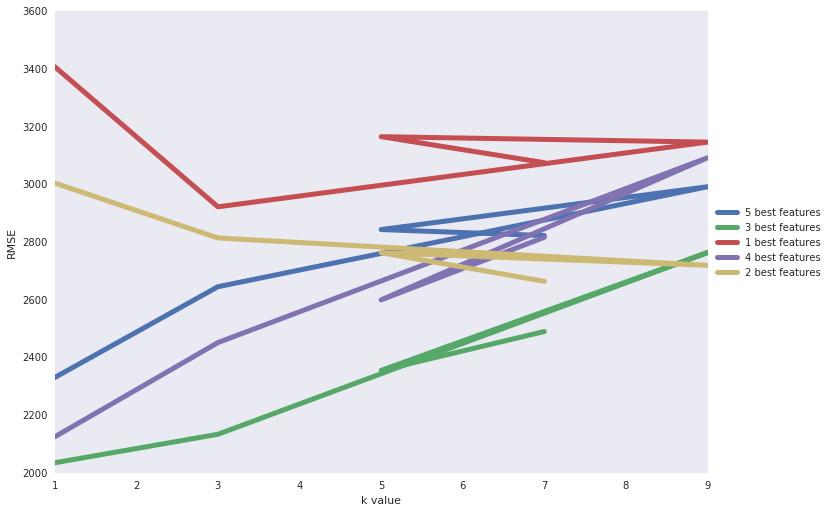

In [21]:
# Plotting our results

for k,v in multivariate_rmse_k.items():
    x = list(v.keys())
    y = list(v.values())
 
    plt.plot(x,y, label=k, linewidth=5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.grid('off')

### Lowest RMSE Table

| Features|K Value|RMSE|
| --- | --- | --- |
| 1 | 3 | 2922.21 |
| 2 | 7 | 2663.73 |
| 3 | 1 | 2034.70 |
| 4 | 1 | 2124.60 |
| 5 | 1 | 2330.29 |

It seems that models that use more features (3,4 or 5) perform better with a lower k value (all score the lowest RMSE with a k value of 1) and have increasing RMSE values as the k value increases. On the other hand, a model that uses less features (1 or 2) perform better with a higher number of k value (3 and 7) to a certain extent. 

The k within the kNN model is used to adjust for granularity. As you increase the number of k, you get the average of nearest k number of values. So, when k=1 is optimal (in our case for features 3, 4 and 5), it implies that averaging more values makes the prediction further away from the actual value - or in other words, that one is introducing more noise with features than valuable data that actually helps.

From our results, we can conclude that an optimal model would be one which doesn't score high in both attributes (k value and number of features) but one which is balanced by first selecting the most important features and then optimizing the k.

Based on our predictions, the best model has 3 best features (`engine-size`, `curb-weight` and `width`) and k value of 1. The RMSE for this model is 2034.70.

# Prediction: Multivariate Case with Cross Validation and Hyperparameter Tuning

Let's rerun the predictions using cross validation (with 5 folds) for the best 1,2,3,4 and 5 features with varying **k** values.

In [22]:
# Multivariate function with varying k and cross-validation
def knn_train_test_multivariate_k_cv(training_column,target_column,df):
    # Setting seed
    np.random.seed(1)
    
    # Randomizing order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    random_df = df.loc[shuffled_index]
    
    # K values
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    # Running the loop for various k values
    for k in k_values:
    
        # Fitting a kNN model and calculating the mse
        from sklearn.model_selection import cross_val_score, KFold
        from sklearn.neighbors import KNeighborsRegressor
        kf = KFold(5, shuffle = True, random_state=1) # 5 folds
        knn = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(knn,random_df[training_column],random_df[target_column],scoring='neg_mean_squared_error',cv=kf)

        # Calculate and return RMSE
        rmses = []
        for i in mses:
            mses = (abs(i))**0.5
            rmses.append(mses)
            rmse = np.mean(mses)

        k_rmses[k] = rmse
    
    # Returning the dicitonary of average RMSES for various k
    return k_rmses
    
# Dictionary to store rmse results
multivariate_rmse_k_cv = {}

# Training a model for each column and returning RMSE value
for i in range(1,6):
    rmse_values = knn_train_test_multivariate_k_cv(best_features[:i],'price', numeric_cars)
    multivariate_rmse_k_cv['{} best features'.format(i)] = rmse_values

# Displaying RMSE results in ascending order
multivariate_rmse_k_cv

{'1 best features': {1: 4788.890902390657,
  3: 3655.937214541118,
  5: 3797.575111436244,
  7: 4185.098204904381,
  9: 4362.291992281801},
 '2 best features': {1: 3474.340433808984,
  3: 3752.5079994733005,
  5: 4177.274341720927,
  7: 4728.897119286475,
  9: 5026.367240289876},
 '3 best features': {1: 3361.541963890976,
  3: 4084.2405832255604,
  5: 4698.455584338326,
  7: 5055.478402744121,
  9: 5204.444288980214},
 '4 best features': {1: 3218.9577078613506,
  3: 4619.4619546003405,
  5: 5162.849127468282,
  7: 5309.873815951423,
  9: 5418.004585336597},
 '5 best features': {1: 3599.2649839932596,
  3: 4858.60257801676,
  5: 5073.660995967311,
  7: 5176.330507606676,
  9: 5280.388485170479}}

In [23]:
# Displaying average rmse and rmse standard deviation
rmse_k_cv_5_average = {}
rmse_k_cv_5_std = {}

for key in multivariate_rmse_k_cv:
    values = list(multivariate_rmse_k_cv[key].values())
    rmse_k_cv_5_average[key] = np.mean(values)
    rmse_k_cv_5_std[key] = np.std(values)
    

print(rmse_k_cv_5_std)

{'1 best features': 405.57761127634546, '3 best features': 679.8953146186794, '2 best features': 580.4965941268007, '5 best features': 615.2169219317639, '4 best features': 811.3170689141407}


Let's visualize our results.

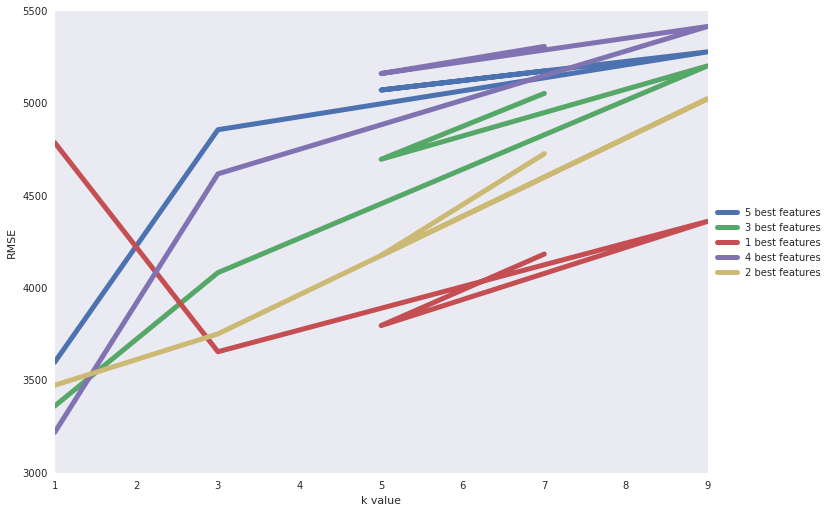

In [24]:
# Plotting our results

for k,v in multivariate_rmse_k_cv.items():
    x = list(v.keys())
    y = list(v.values())
 
    plt.plot(x,y, label=k, linewidth=5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.grid('off')

It seems that on average, mean rmse is much higher using cross validation using any number of the best features. One possible explanantion for this could be that due to the limited amount of data (only 201 rows) and a relatively large number of folds (5), the variance of the fold-by-fold errors increases and results in a higher average rmse. Lets confirms this by decreasing the number folds. We should expect the lowest rmse for any number of features to be lower when we reduce the folds from 5 to 3.

In [25]:
# Multivariate function with varying k and cross-validation with 3 folds
def knn_train_test_multivariate_k_cv_3(training_column,target_column,df):
    # Setting seed
    np.random.seed(1)
    
    # Randomizing order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    random_df = df.loc[shuffled_index]
    
    # K values
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    # Running the loop for various k values
    for k in k_values:
    
        # Fitting a kNN model and calculating the mse
        from sklearn.model_selection import cross_val_score, KFold
        from sklearn.neighbors import KNeighborsRegressor
        kf = KFold(3, shuffle = True, random_state=1) # 3 folds
        knn = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(knn,random_df[training_column],random_df[target_column],scoring='neg_mean_squared_error',cv=kf)

        # Calculate and return RMSE
        rmses = []
        for i in mses:
            mses = (abs(i))**0.5
            rmses.append(mses)
            rmse = np.mean(mses)

        k_rmses[k] = rmse
    
    # Returning the dicitonary of average RMSES for various k
    return k_rmses
    
# Dictionary to store rmse results
multivariate_rmse_k_cv_3 = {}

# Training a model for each column and returning RMSE value
for i in range(1,6):
    rmse_values = knn_train_test_multivariate_k_cv_3(best_features[:i],'price', numeric_cars)
    multivariate_rmse_k_cv_3['{} best features'.format(i)] = rmse_values

# Displaying RMSE results in ascending order
multivariate_rmse_k_cv_3

{'1 best features': {1: 4209.616723078703,
  3: 3269.014452280773,
  5: 3461.444069800668,
  7: 3791.829275955833,
  9: 4048.5257945662734},
 '2 best features': {1: 3393.9144594713866,
  3: 3692.5080175092126,
  5: 4090.1755607323194,
  7: 4178.846335862463,
  9: 4439.982903766407},
 '3 best features': {1: 3093.4900012865246,
  3: 3533.014569071805,
  5: 4081.0100467642865,
  7: 4411.952878033677,
  9: 4603.81891082427},
 '4 best features': {1: 3002.9693613279883,
  3: 4103.067073295317,
  5: 4367.19816269411,
  7: 4670.3017649171625,
  9: 4861.943038824034},
 '5 best features': {1: 2668.219348655075,
  3: 3960.0605865425714,
  5: 4451.883844752037,
  7: 4526.148685263084,
  9: 4668.602146430811}}

In [26]:
# Displaying average rmse and rmse standard deviation
rmse_k_cv_3_average = {}
rmse_k_cv_3_std = {}

for key in multivariate_rmse_k_cv_3:
    values = list(multivariate_rmse_k_cv_3[key].values())
    rmse_k_cv_3_average[key] = np.mean(values)
    rmse_k_cv_3_std[key] = np.std(values)
    

rmse_k_cv_3_average
rmse_k_cv_3_std

{'1 best features': 351.15275639740656,
 '2 best features': 370.73537764134505,
 '3 best features': 559.5331565349197,
 '4 best features': 652.6223869546536,
 '5 best features': 733.23659615009}

# Conclusion

In this projects, we analyzed...

It is worth noticing mentioning that working under the impression that a lower RMSE always means that a model is more accurate isn't always true. A model has two sources of error, **bias** and **variance**.

**Bias** descirbes error that results in bad assumptions about learning algorithm. For example, assuming that only one feature like the car's weight, relates to a car price will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's price is affected by many other factors besides just its weight. This was also evident when we fit a univriate model with only one feature resulting in a higher average RMSE.

**Variance** describes error that occurs because of the variability of a model's predicted values. For example, if we were given 1000 features for each car and used every single feature to train an incredibly complicated multivariate regression model, it will have low bias but a high variance. This was evident when we fit multivariate models with more features (4, 5) that resulted in higher RMSE standard deviation.

In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff. The diagram below helps visualize the concept well.

![bias_variance_Image](https://s3.amazonaws.com/dq-content/bias_variance.png)